**Название проекта**

Выбор локации для скважины.

**Описание проекта**

Допустим, вы работаете в добывающей компании «ГлавРосГосНефть». Нужно решить, где бурить новую скважину. 

Шаги для выбора локации обычно такие:
* В избранном регионе собирают характеристики для скважин: качество нефти и объём её запасов;
* Строят модель для предсказания объёма запасов в новых скважинах;
* Выбирают скважины с самыми высокими оценками значений;
* Определяют регион с максимальной суммарной прибылью отобранных скважин.

**Цель исследования**

Построить модель для определения региона, где добыча принесёт наибольшую прибыль. Проанализируйте возможную прибыль и риски техникой Bootstrap.

**Критерии исследования**
- Для обучения модели подходит только линейная регрессия (остальные — недостаточно предсказуемые).
- При разведке региона исследуют 500 точек, из которых с помощью машинного обучения выбирают 200 лучших для разработки.
- Бюджет на разработку скважин в регионе — 10 млрд рублей.
- При нынешних ценах один баррель сырья приносит 450 рублей дохода. Доход с каждой единицы продукта составляет 450 тыс. рублей, поскольку объём указан в тысячах баррелей.
- После оценки рисков нужно оставить лишь те регионы, в которых вероятность убытков меньше 2.5%. Среди них выбирают регион с наибольшей средней прибылью.
- Данные синтетические: детали контрактов и характеристики месторождений не разглашаются.

**Исходные данные**

Данные геологоразведки трёх регионов находятся в файлах: 

- /datasets/geo_data_0.csv. Скачать датасет
- /datasets/geo_data_1.csv. Скачать датасет
- /datasets/geo_data_2.csv. Скачать датасет
- id — уникальный идентификатор скважины;
- f0, f1, f2 — три признака точек (неважно, что они означают, но сами признаки значимы);
- product — объём запасов в скважине (тыс. баррелей).



<a href="#qwerty">План исследования находится в меню Table of contents</a>

<a id="qwerty"></a>

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Загрузка-данных" data-toc-modified-id="Загрузка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Загрузка данных</a></span></li><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Подготовка данных</a></span></li><li><span><a href="#Обучение-моделей" data-toc-modified-id="Обучение-моделей-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Обучение моделей</a></span><ul class="toc-item"><li><span><a href="#Обучение-модели-РЕГИОН-0" data-toc-modified-id="Обучение-модели-РЕГИОН-0-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Обучение модели РЕГИОН 0</a></span></li><li><span><a href="#Обучение-модели-РЕГИОН-1" data-toc-modified-id="Обучение-модели-РЕГИОН-1-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Обучение модели РЕГИОН 1</a></span></li><li><span><a href="#Обучение-модели-РЕГИОН-2" data-toc-modified-id="Обучение-модели-РЕГИОН-2-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Обучение модели РЕГИОН 2</a></span></li><li><span><a href="#Результаты-обучения" data-toc-modified-id="Результаты-обучения-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Результаты обучения</a></span></li></ul></li><li><span><a href="#Подготовка-к-расчету-прибыли" data-toc-modified-id="Подготовка-к-расчету-прибыли-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Подготовка к расчету прибыли</a></span></li><li><span><a href="#Расчет-прибыли-скважин" data-toc-modified-id="Расчет-прибыли-скважин-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Расчет прибыли скважин</a></span></li><li><span><a href="#Риски-и-прибыль-для-каждого-региона" data-toc-modified-id="Риски-и-прибыль-для-каждого-региона-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Риски и прибыль для каждого региона</a></span></li><li><span><a href="#Итоговый-вывод" data-toc-modified-id="Итоговый-вывод-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Итоговый вывод</a></span></li></ul></div>

**Описание данных**

Данные геологоразведки трёх регионов находятся в файлах: 

- /datasets/geo_data_0.csv. Скачать датасет
- /datasets/geo_data_1.csv. Скачать датасет
- /datasets/geo_data_2.csv. Скачать датасет
- id — уникальный идентификатор скважины;
- f0, f1, f2 — три признака точек (неважно, что они означают, но сами признаки значимы);
- product — объём запасов в скважине (тыс. баррелей).

**Условия задачи:**
- Для обучения модели подходит только линейная регрессия (остальные — недостаточно предсказуемые).
- При разведке региона исследуют 500 точек, из которых с помощью машинного обучения выбирают 200 лучших для разработки.
- Бюджет на разработку скважин в регионе — 10 млрд рублей.
- При нынешних ценах один баррель сырья приносит 450 рублей дохода. Доход с каждой единицы продукта составляет 450 тыс. рублей, поскольку объём указан в тысячах баррелей.
- После оценки рисков нужно оставить лишь те регионы, в которых вероятность убытков меньше 2.5%. Среди них выбирают регион с наибольшей средней прибылью.
- Данные синтетические: детали контрактов и характеристики месторождений не разглашаются.

### Загрузка данных

In [1]:
!pip install -Uq scikit-learn
!pip install imblearn

In [2]:
import warnings
import os
import requests

import math
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from IPython.display import HTML

from imblearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler, MinMaxScaler

from sklearn.model_selection import RandomizedSearchCV

from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet


warnings.filterwarnings('ignore')

In [3]:
local_paths = [
    '/datasets/geo_data_0.csv',
    '/datasets/geo_data_1.csv',
    '/datasets/geo_data_2.csv'
]

# URL-адреса для загрузки файлов, если локальные не найдены
urls = [
    'https://code.s3.yandex.net/datasets/geo_data_0.csv',
    'https://code.s3.yandex.net/datasets/geo_data_1.csv',
    'https://code.s3.yandex.net/datasets/geo_data_2.csv'
]

def load_dataframes(local_paths, urls, set_index_col=0):

    dataframes = []
    
    for local_path, url in zip(local_paths, urls):
        try:
            if os.path.exists(local_path):
                df = pd.read_csv(local_path, decimal='.', sep=',', index_col=set_index_col)
                print(f"Файл {local_path} успешно загружен локально")
            else:
                # Если локального файла нет, пробуем загрузить по URL
                response = requests.get(url, timeout=10)
                response.raise_for_status()  # Проверяем статус запроса
                df = pd.read_csv(url, decimal='.', sep=',', index_col=set_index_col)
                print(f"Файл {url} успешно загружен по URL")
                
            dataframes.append(df)
            
        except Exception as e:
            raise FileNotFoundError(f"Не удалось загрузить файл: {local_path} или {url}. Ошибка: {str(e)}")
    
    return dataframes

# Загружаем данные для трех регионов
try:
    region_0, region_1, region_2 = load_dataframes(local_paths, urls, set_index_col='id')
    print("Данные успешно загружены для всех регионов")
except Exception as e:
    print(f"Ошибка при загрузке данных: {str(e)}")

Файл https://code.s3.yandex.net/datasets/geo_data_0.csv успешно загружен по URL
Файл https://code.s3.yandex.net/datasets/geo_data_1.csv успешно загружен по URL
Файл https://code.s3.yandex.net/datasets/geo_data_2.csv успешно загружен по URL
Данные успешно загружены для всех регионов


In [4]:
display(region_0.head())
region_0.info()

,f0,f1,f2,product
id,,,,
txEyH,0.705745,-0.497823,1.221170,105.280062
2acmU,1.334711,-0.340164,4.365080,73.037750
409Wp,1.022732,0.151990,1.419926,85.265647
iJLyR,-0.032172,0.139033,2.978566,168.620776
Xdl7t,1.988431,0.155413,4.751769,154.036647


<class 'pandas.core.frame.DataFrame'>
Index: 100000 entries, txEyH to 1CWhH
Data columns (total 4 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   f0       100000 non-null  float64
 1   f1       100000 non-null  float64
 2   f2       100000 non-null  float64
 3   product  100000 non-null  float64
dtypes: float64(4)
memory usage: 3.8+ MB


In [5]:
display(region_1.head())
region_1.info()

,f0,f1,f2,product
id,,,,
kBEdx,-15.001348,-8.276000,-0.005876,3.179103
62mP7,14.272088,-3.475083,0.999183,26.953261
vyE1P,6.263187,-5.948386,5.001160,134.766305
KcrkZ,-13.081196,-11.506057,4.999415,137.945408
AHL4O,12.702195,-8.147433,5.004363,134.766305


<class 'pandas.core.frame.DataFrame'>
Index: 100000 entries, kBEdx to relB0
Data columns (total 4 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   f0       100000 non-null  float64
 1   f1       100000 non-null  float64
 2   f2       100000 non-null  float64
 3   product  100000 non-null  float64
dtypes: float64(4)
memory usage: 3.8+ MB


In [6]:
display(region_2.head())
region_2.info()

,f0,f1,f2,product
id,,,,
fwXo0,-1.146987,0.963328,-0.828965,27.758673
WJtFt,0.262778,0.269839,-2.530187,56.069697
ovLUW,0.194587,0.289035,-5.586433,62.871910
q6cA6,2.236060,-0.553760,0.930038,114.572842
WPMUX,-0.515993,1.716266,5.899011,149.600746


<class 'pandas.core.frame.DataFrame'>
Index: 100000 entries, fwXo0 to V9kWn
Data columns (total 4 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   f0       100000 non-null  float64
 1   f1       100000 non-null  float64
 2   f2       100000 non-null  float64
 3   product  100000 non-null  float64
dtypes: float64(4)
memory usage: 3.8+ MB


**Вывод по загрузке данных**

Данные были успешно загружены

* пропуски отсутствуют
* типы данных корректны
* названия столбцов удовлетворяют стандарту sneak_case

### Подготовка данных

Проверим датафреймы на наличие явных дубликатов

In [7]:
region_0.duplicated().sum()

0

In [8]:
region_1.duplicated().sum()

0

In [9]:
region_2.duplicated().sum()

0

Исследуем признаки на наличие выбросов

In [10]:
# Функция для построения графиков количественного признака
def grafics(df_col, label_x2, label_y2, title):
    # Создание фигуры и осей
    fig, axs = plt.subplots(1, 2, figsize=(12, 5))
    fig.suptitle(title, fontsize=14, y=1.05)  # Общий заголовок
    # Гистограмма
    axs[0].hist(df_col,edgecolor='black', bins=30, alpha=0.7)
    axs[0].set_title('Гистограмма', fontsize=12)
    axs[0].set_xlabel(label_x2, fontsize=10)
    axs[0].set_ylabel(label_y2, fontsize=10)
    axs[0].grid(linestyle='--', alpha=0.5)
    # Диаграмма размаха
    sns.boxplot(
        x=df_col, 
        ax=axs[1], 
        color='lightgreen', 
        width=0.4,
        linewidth=1.5,
        flierprops=dict(
            marker='o', 
            markerfacecolor='red', 
            markersize=6,
            markeredgecolor='black'
        )
    )
    axs[1].set_title('Диаграмма размаха (Boxplot)', fontsize=12)
    axs[1].set_xlabel(label_x2, fontsize=10)
    
    
    plt.tight_layout()
    plt.show()

**Исследуем РЕГИОН 0**

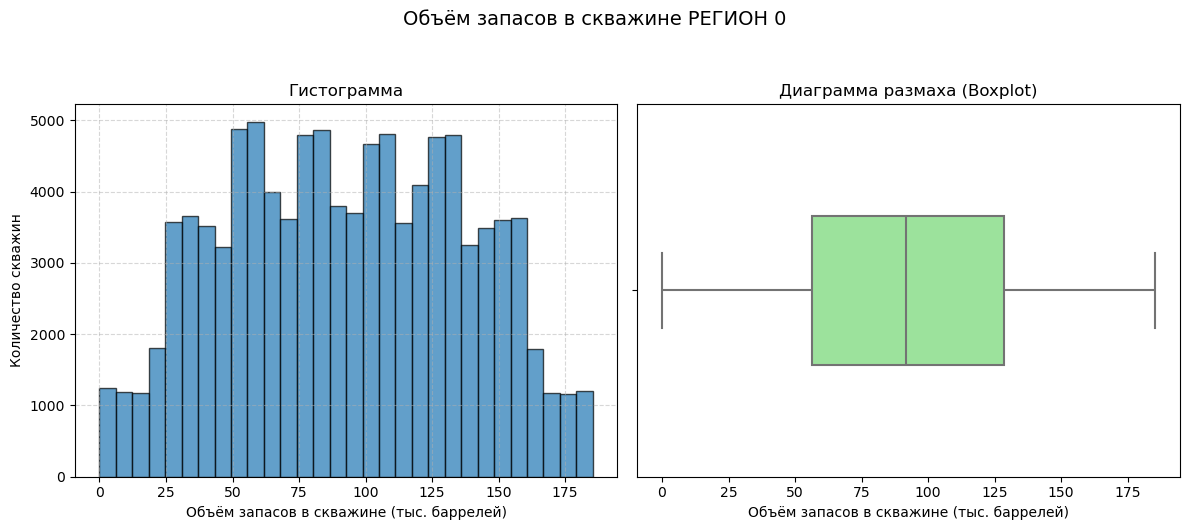

In [11]:
grafics(region_0['product'], 'Объём запасов в скважине (тыс. баррелей)', 'Количество скважин', 
       'Объём запасов в скважине РЕГИОН 0')

Обычно объем запасов в скважине составляет 55-130 тыс.баррелей

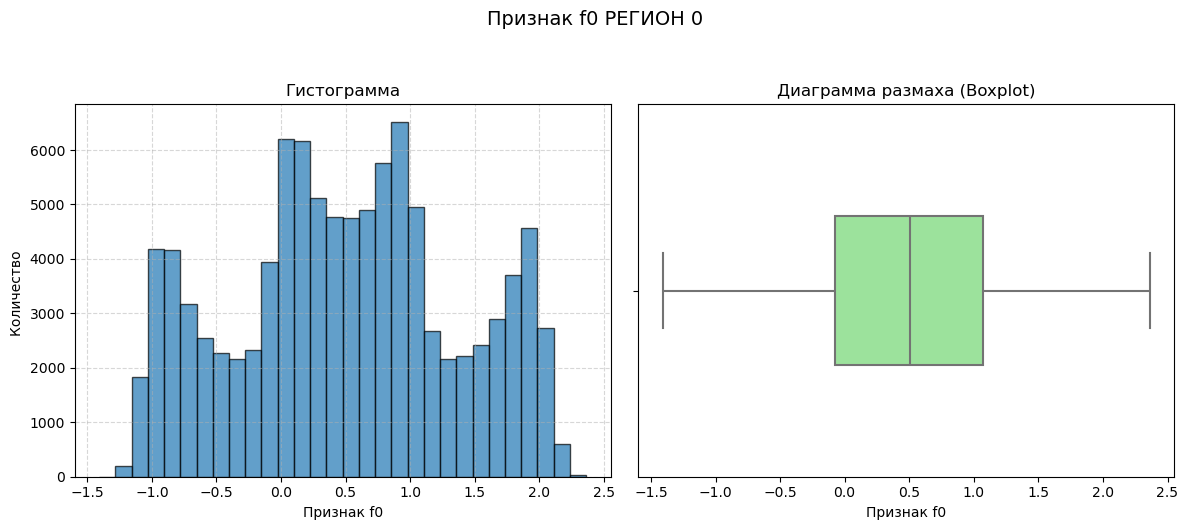

In [12]:
grafics(region_0['f0'], 'Признак f0', 'Количество ', 
       'Признак f0 РЕГИОН 0')

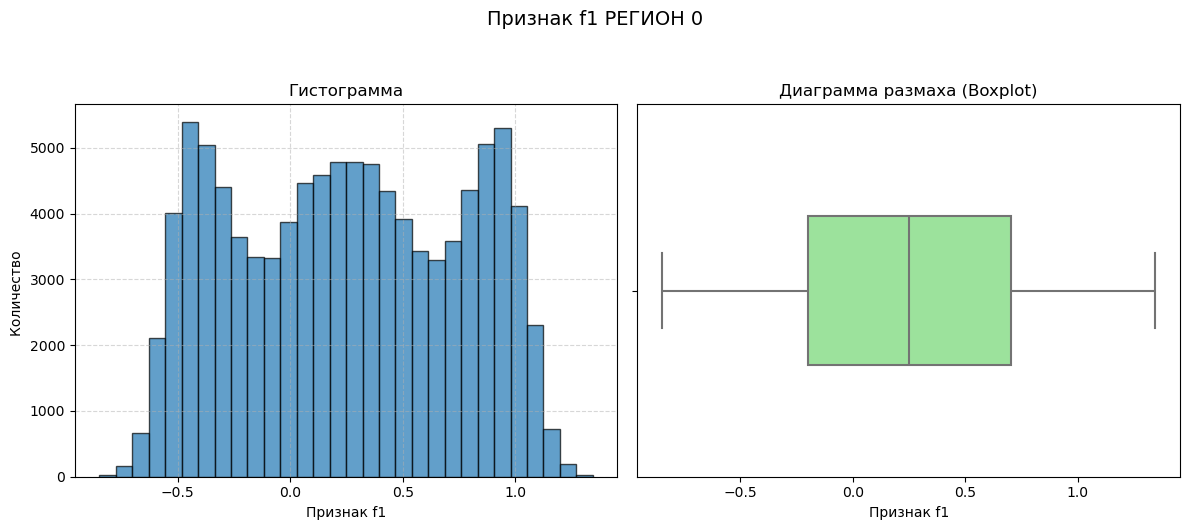

In [13]:
grafics(region_0['f1'], 'Признак f1', 'Количество ', 
       'Признак f1 РЕГИОН 0')

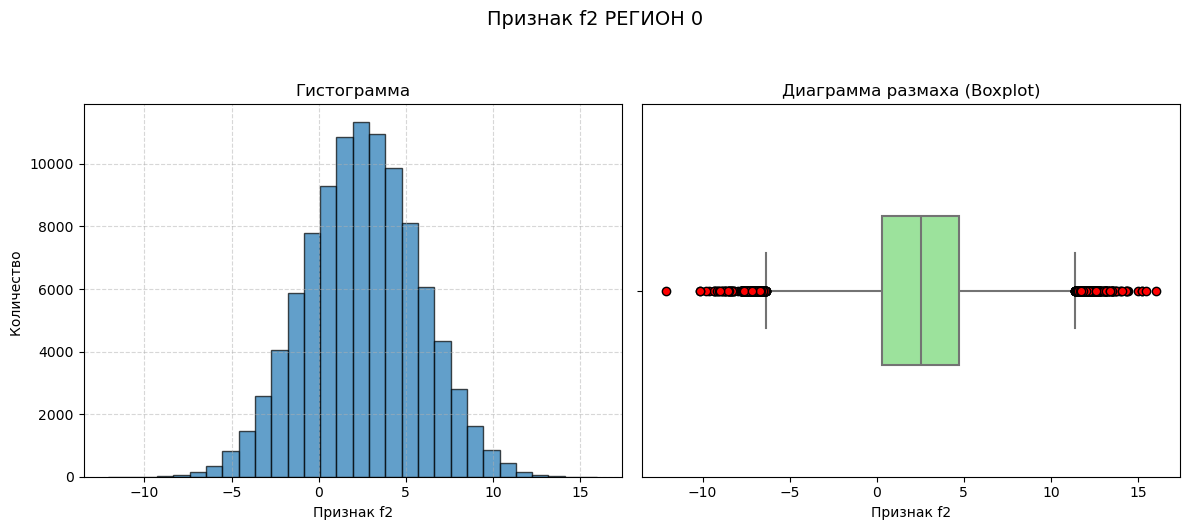

In [14]:
grafics(region_0['f2'], 'Признак f2', 'Количество ', 
       'Признак f2 РЕГИОН 0')

**Исследуем РЕГИОН 1**

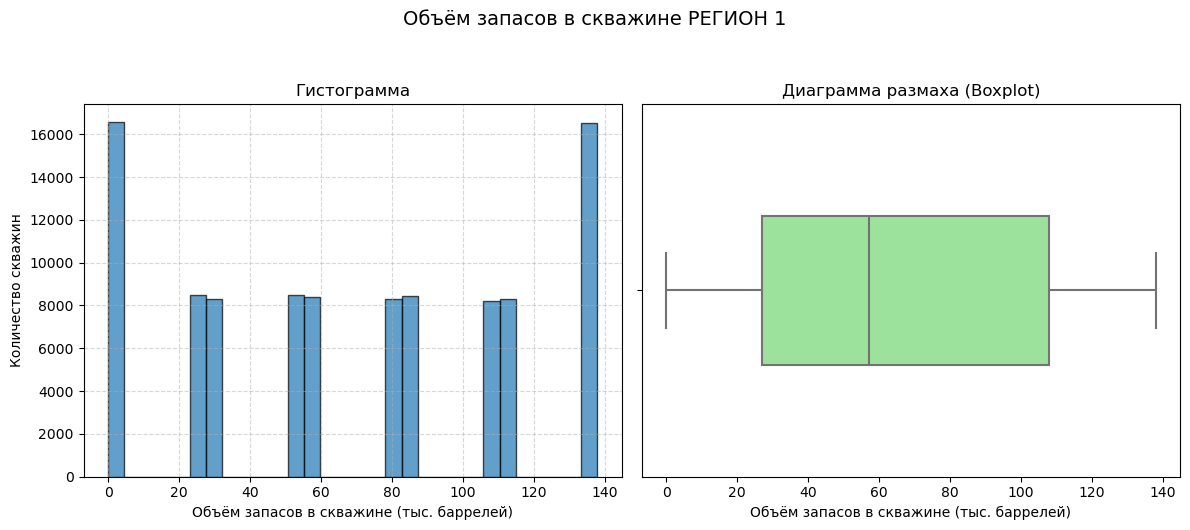

In [15]:
grafics(region_1['product'], 'Объём запасов в скважине (тыс. баррелей)', 'Количество скважин', 
       'Объём запасов в скважине РЕГИОН 1')

В регионе 1 меньше значений, которые может принимать объем скважин, чем в остальных регионах. Недостаточно данных, чтобы лучше оценить распределение

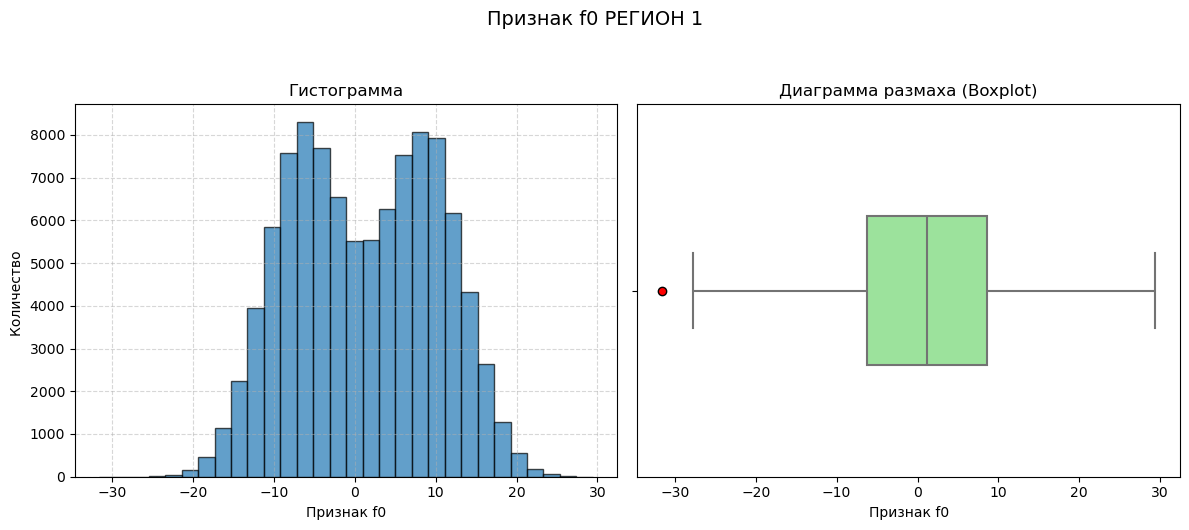

In [16]:
grafics(region_1['f0'], 'Признак f0', 'Количество ', 
       'Признак f0 РЕГИОН 1')

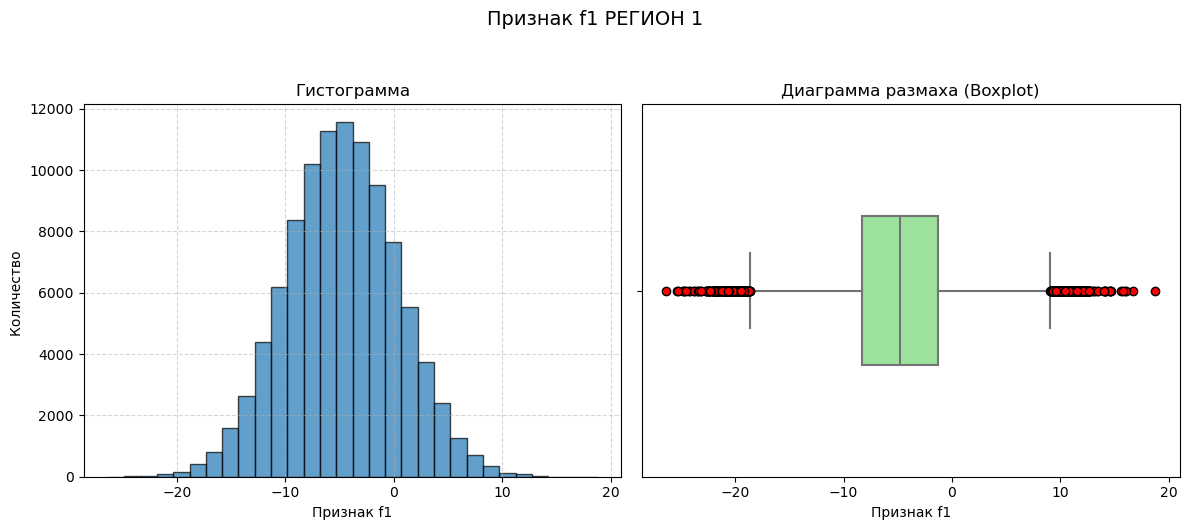

In [17]:
grafics(region_1['f1'], 'Признак f1', 'Количество ', 
       'Признак f1 РЕГИОН 1')

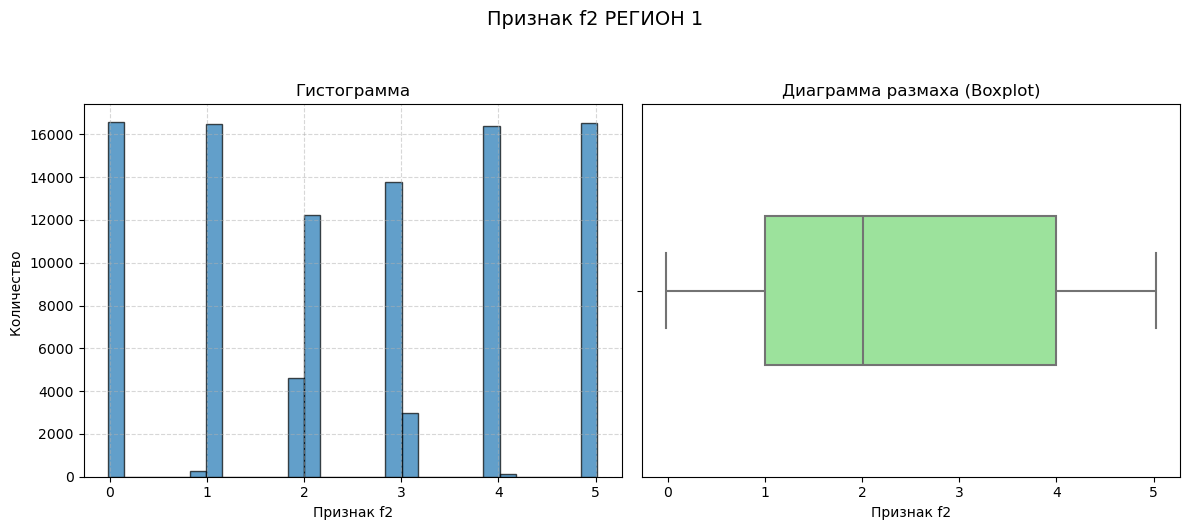

In [18]:
grafics(region_1['f2'], 'Признак f2', 'Количество ', 
       'Признак f2 РЕГИОН 1')

**Исследуем РЕГИОН 2**

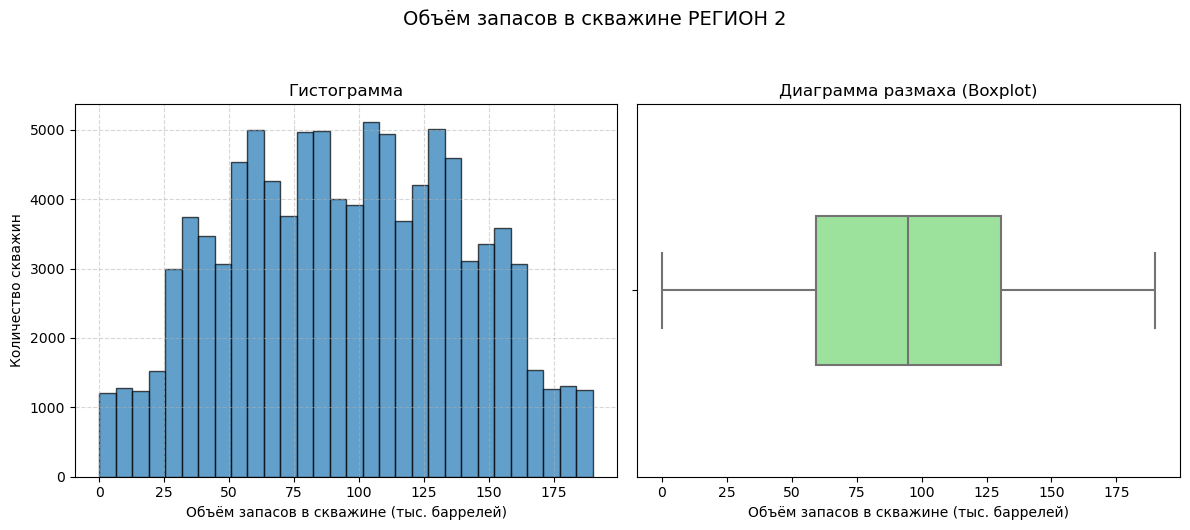

In [19]:
grafics(region_2['product'], 'Объём запасов в скважине (тыс. баррелей)', 'Количество скважин', 
       'Объём запасов в скважине РЕГИОН 2')

В регионе 2 обычно обьем скважин составляет 45-130 тыс.барелей

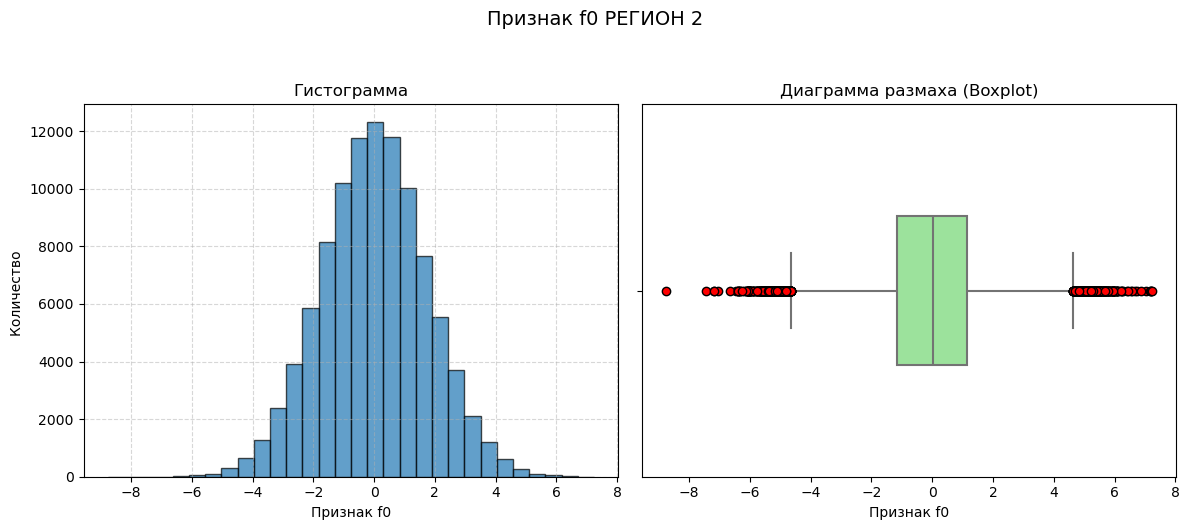

In [20]:
grafics(region_2['f0'], 'Признак f0', 'Количество ', 
       'Признак f0 РЕГИОН 2')

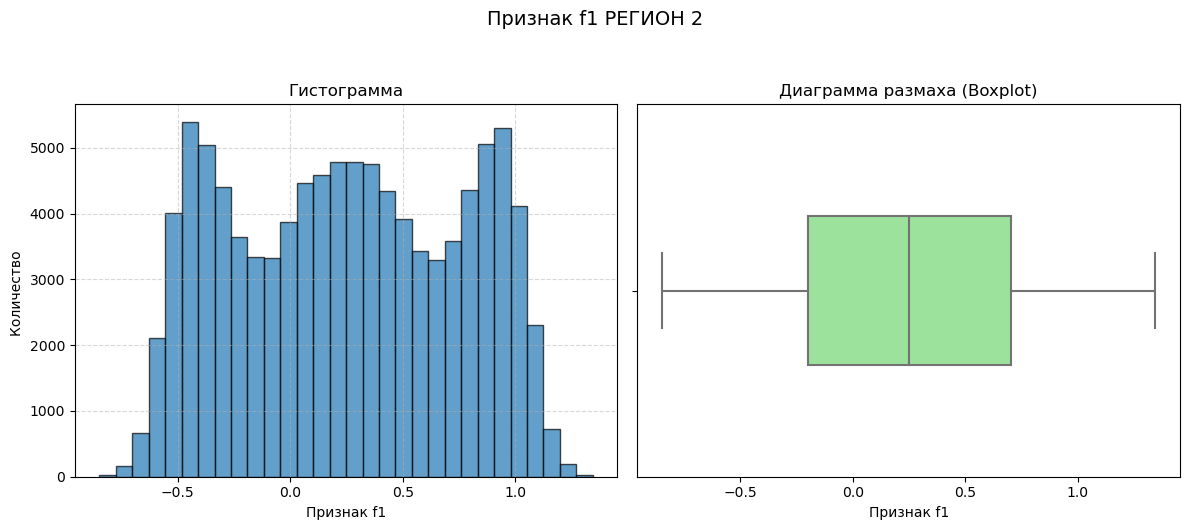

In [21]:
grafics(region_0['f1'], 'Признак f1', 'Количество ', 
       'Признак f1 РЕГИОН 2')

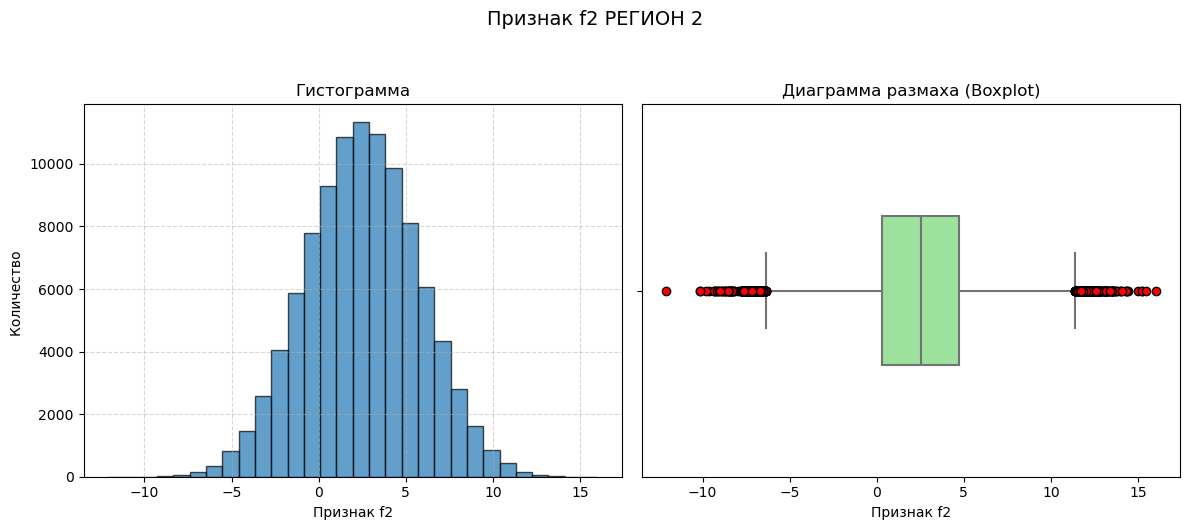

In [22]:
grafics(region_0['f2'], 'Признак f2', 'Количество ', 
       'Признак f2 РЕГИОН 2')

**Посмотрим на корреляцию признаков**

Перед нами стоит задача обучить модель линейной регрессии. Посмотрим на линейные зависимости с помощью матрицы корреляций Пирсона


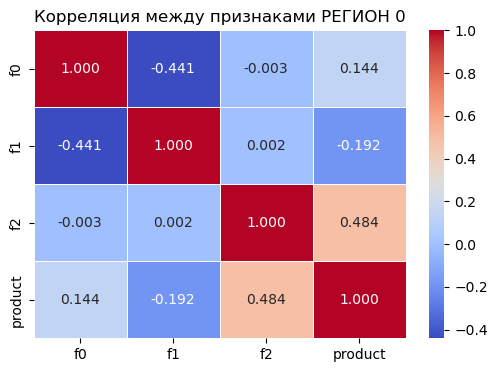

In [23]:
correlation_matrix = region_0.corr()

plt.figure(figsize=(6,4))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".3f", linewidths=0.5)
plt.title("Корреляция между признаками РЕГИОН 0")
plt.show()

* признак **f2** средне коррелирует с целевым **product**
* признаки **f0** и **f1** слабо коррелируют с целевым **product**

Для обучения будем использовать все входные признаки

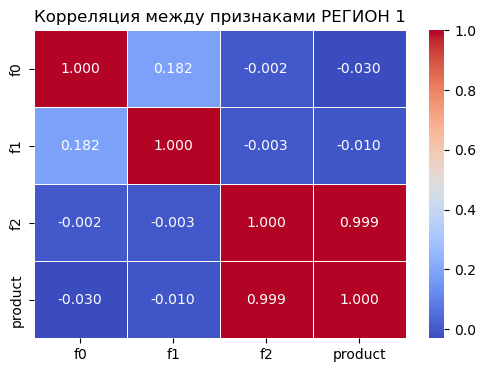

In [24]:
correlation_matrix = region_1.corr()

plt.figure(figsize=(6,4))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".3f", linewidths=0.5)
plt.title("Корреляция между признаками РЕГИОН 1")
plt.show()

* признак **f2** линейно зависим с целевыв **product**
* признаки **f0** и **f1**  почти не связаны линейно с целевым **product**

Не будем удалять признак **f2**, так как скорее всего именно благодаря нему получится предказать значения целевого признака. Для обучения оставим все признаки

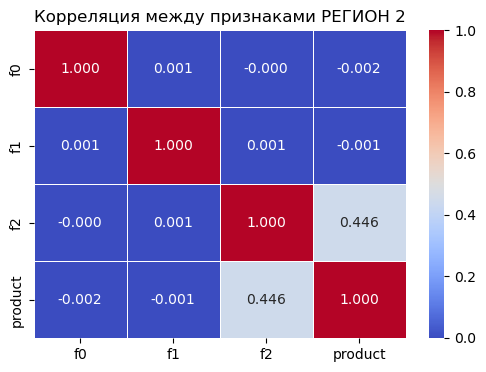

In [25]:
correlation_matrix = region_2.corr()

plt.figure(figsize=(6,4))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".3f", linewidths=0.5)
plt.title("Корреляция между признаками РЕГИОН 2")
plt.show()

Ситуация похожа на РЕГИОН 1. Признаки **f0** и **f1** почти не связаны линейно с целевым **product**. А **f2** имеет умеренную линейную связь с **product**. Для обучения будем использовать все признаки

**Вывод по подготовке данных**

**1. Дубликаты**
* дубликаты отсутсвуют

**2. Анализ признаков и аномалий**
* В *РЕГИОНЕ 0* обычно объем запасов в скважине составляет 55-130 тыс.баррелей
* В *РЕГИОНЕ 1* заметно меньше значений, которые может принимать объем скважин, чем в остальных регионах. Недостаточно данных, чтобы лучше оценить распределение
* В *РЕГИОНЕ 2* обычно обьем скважин составляет 45-130 тыс.барелей
* Заметные выбросы не обнаружены

**3. Анализ корреляции признаков**

*РЕГИОН 0:*
* признак **f2** средне коррелирует с целевым **product**
* признаки **f0** и **f1** слабо коррелируют с целевым **product**

Для обучения будем использовать все входные признаки


*РЕГИОН 1:*
* признак **f2** линейно зависим с целевыв **product**
* признаки **f0** и **f1**  почти не связаны линейно с целевым **product**

Не будем удалять признак **f2**, так как скорее всего именно благодаря нему получится предказать значения целевого признака. Для обучения оставим все признаки

*РЕГИОН 2:*

Ситуация похожа на РЕГИОН 1. Признаки **f0** и **f1** почти не связаны линейно с целевым **product**. А **f2** имеет умеренную линейную связь с **product**. Для обучения будем использовать все признаки


### Обучение моделей

План:

1. Создадим функции:
* prepros_data(data), которая будет отвечать за разбивку данных на обучающую и валидационную выборки в соотношении 75:25
* model_param(X_train, y_train), которая с помощью пайплайна будет масштабировать признаки, затем обучать их, перебирая разные линейные модели. 

2. Применим функции к датафреймам region_0, region_1, region_2, получим:
* название лучшей модели с ее параметрами
* предсказания среднего запаса сырья
* среднеквадратичную ошибку RMSE

In [26]:
def prepros_data(data):
    
    #разобьем данные на выходной и целевой признаки
    X = data.drop('product', axis=1)
    y = data['product']
    
    #разобьем данные на обучающую и валидационную выборки в соотношении 75:25.
    X_train, X_valid, y_train, y_valid = train_test_split(
        X,
        y,
        random_state=42,
        test_size=0.25)
    
    return X_train, X_valid, y_train, y_valid

In [27]:
def model_param(X_train, y_train):


    num_columns = X_train.select_dtypes(include='number').columns.tolist()


    # создаём общий пайплайн для подготовки данных
    data_preprocessor = ColumnTransformer(
        [
         ('num', MinMaxScaler(), num_columns)
        ], 
        remainder='passthrough'
    )
    # создаём итоговый пайплайн: подготовка данных и модель
    pipe_final = Pipeline([
        ('preprocessor', data_preprocessor),
        ('models', LinearRegression())
    ])
    
    
    param_grid = [
        # Параметры для LinearRegression
        {
            'models': [LinearRegression()],
            'preprocessor__num': [StandardScaler(), MinMaxScaler(), 'passthrough']
        },

        # Параметры для Ridge
        {
            'models': [Ridge(random_state=42)],
            'models__alpha': [0.001, 0.01, 0.1, 1, 10],
            'preprocessor__num': [StandardScaler(), MinMaxScaler(), 'passthrough']
        },

        # Параметры для Lasso
        {
            'models': [Lasso(random_state=42)],
            'models__alpha': [0.001, 0.01, 0.1, 1, 10],
            'preprocessor__num': [StandardScaler(), MinMaxScaler(), 'passthrough']
        },

        # Параметры для ElasticNet
        {
            'models': [ElasticNet(random_state=42)],
            'models__alpha': [0.001, 0.01, 0.1, 1, 10],
            'models__l1_ratio': [0.2, 0.5, 0.8],
            'preprocessor__num': [StandardScaler(), MinMaxScaler(), 'passthrough']
        }
    ]
    
    randomized_search = RandomizedSearchCV(
                            pipe_final, 
                            param_distributions=param_grid,
                            cv=5,
                            scoring='neg_root_mean_squared_error',  # встроенный RMSE (но с отрицательным знаком)
                            random_state=42,
                            n_jobs=-1,
                            n_iter=10)
                
    randomized_search.fit(X_train, y_train)
    return randomized_search

#### Обучение модели РЕГИОН 0 

In [28]:
X_train, X_valid, y_train, y_valid_0 = prepros_data(region_0)
display(X_train.shape)
display(X_valid.shape)
display(y_train.shape)
y_valid_0.shape

(75000, 3)

(25000, 3)

(75000,)

(25000,)

In [29]:
model_0 = model_param(X_train, y_train)

In [30]:
mean_0 = model_0.best_estimator_.predict(X_valid).mean()
rmse_0 = -model_0.best_score_


print('Результаты для РЕГИОНА 0')
print(f"Лучшая модель: {model_0.best_estimator_.named_steps['models']}")
print(f"Предсказания среднего запаса сырья: {mean_0:.2f}")
print(f'Метрика RMSE: {rmse_0:.2f}')

Результаты для РЕГИОНА 0
Лучшая модель: Ridge(alpha=0.1, random_state=42)
Предсказания среднего запаса сырья: 92.40
Метрика RMSE: 37.67


In [31]:
predict_0 = model_0.best_estimator_.predict(X_valid)

#### Обучение модели РЕГИОН 1

In [32]:
X_train, X_valid, y_train, y_valid_1 = prepros_data(region_1)
display(X_train.shape)
display(X_valid.shape)
display(y_train.shape)
y_valid_1.shape

(75000, 3)

(25000, 3)

(75000,)

(25000,)

In [33]:
model_1 = model_param(X_train, y_train)

In [34]:
mean_1 = model_1.best_estimator_.predict(X_valid).mean()
rmse_1 = -model_1.best_score_

print('Результаты для РЕГИОНА 1')
print(f"Лучшая модель: {model_1.best_estimator_.named_steps['models']}")
print(f"Предсказания среднего запаса сырья: {mean_1:.2f}")
print(f'Метрика RMSE: {rmse_1:.2f}')

Результаты для РЕГИОНА 1
Лучшая модель: LinearRegression()
Предсказания среднего запаса сырья: 68.71
Метрика RMSE: 0.89


In [35]:
predict_1 = model_1.best_estimator_.predict(X_valid)

#### Обучение модели РЕГИОН 2

In [36]:
X_train, X_valid, y_train, y_valid_2 = prepros_data(region_2)
display(X_train.shape)
display(X_valid.shape)
display(y_train.shape)
y_valid_2.shape

(75000, 3)

(25000, 3)

(75000,)

(25000,)

In [37]:
model_2 = model_param(X_train, y_train)

In [38]:
mean_2 = model_2.best_estimator_.predict(X_valid).mean()
rmse_2 = -model_2.best_score_

print('Результаты для РЕГИОНА 2')
print(f"Лучшая модель: {model_2.best_estimator_.named_steps['models']}")
print(f"Предсказания среднего запаса сырья: {mean_2:.2f}")
print(f'Метрика RMSE: {rmse_2:.2f}')

Результаты для РЕГИОНА 2
Лучшая модель: Ridge(alpha=0.1, random_state=42)
Предсказания среднего запаса сырья: 94.77
Метрика RMSE: 40.03


In [39]:
predict_2 = model_2.best_estimator_.predict(X_valid)

#### Результаты обучения

In [40]:
print('Суммарный предсказанный запас в регионе 0 -', predict_0.sum())
print('Суммарный реальный запас в регионе 0 -', y_valid_0.sum())
print()
print('Суммарный предсказанный запас в регионе 1 -', predict_1.sum())
print('Суммарный реальный запас в регионе 1 -', y_valid_1.sum())
print()
print('Суммарный предсказанный запас в регионе 2 -', predict_2.sum())
print('Суммарный реальный запас в регионе 2 -', y_valid_2.sum())

Суммарный предсказанный запас в регионе 0 - 2309970.4213286415
Суммарный реальный запас в регионе 0 - 2308148.909271097

Суммарный предсказанный запас в регионе 1 - 1717821.9509784402
Суммарный реальный запас в регионе 1 - 1718134.5186806861

Суммарный предсказанный запас в регионе 2 - 2369276.003418126
Суммарный реальный запас в регионе 2 - 2378774.97679299


Предсказанные и реальные запасы почти совпали, что говорит о хорошей точности модели

In [41]:
# Создаем DataFrame
rez_df = pd.DataFrame({
    'Регион': [0, 1, 2],
    'Средние запасы (тыс. баррелей)': [round(x, 2) for x in [mean_0, mean_1, mean_2]],
    'RMSE': [round(x, 2) for x in [rmse_0, rmse_1, rmse_2]]
})


html = rez_df.to_html(
    index=False,
    float_format='%.2f',
    border=0,
    classes='dataframe',  
    justify='center'      
)


styled_html0 = f"""
<style>
    .dataframe td {{
        color: black;
        font-family: Arial;
    }}
    .dataframe th {{
        background-color: #E6E6FA;
    }}
</style>
{html}
"""

HTML(styled_html0)

Регион,Средние запасы (тыс. баррелей),RMSE
0,92.40,37.67
1,68.71,0.89
2,94.77,40.03


**Вывод**

Регион 1 дает стабильные и предсказуемые результаты

Регионы 0 и 2 могут содержать как очень богатые, так и бедные скважины, что увеличивает риски

### Подготовка к расчету прибыли

Ниже находятся константы, необходимые для вычислений

In [42]:
BUDGET = 10**10  # Бюджет разработки (10 млрд руб)
INCOME_PER_UNIT = 450000  # Доход с тыс. баррелей (450 руб/баррель * 1000)
TOTAL_POINTS = 500  # Исследуемые точки
WELLS_TO_DRILL = 200  # Скважин для разработки

Теперь рассчитаем достаточный объём сырья для безубыточной разработки новой скважины

Безубыточный объём = Общие затраты / Доход с единицы продукции

In [43]:
break_even_total = BUDGET / INCOME_PER_UNIT 
# = 10,000,000,000 / 450,000 
# = 22,222.22 тыс. баррелей (для 200 скважин)
break_even_per_well = break_even_total / WELLS_TO_DRILL
# = 22,222.22 / 200 
# = 111.11 тыс. баррелей на скважину

In [44]:
break_even_per_well

111.11111111111111

Каждая из 200 скважин должна в среднем давать 111,110 тыс. баррелей, чтобы проект окупился

In [45]:
data = {
    'Регион': ['0', '1', '2'],
    'Средние запасы (тыс. баррелей)': [round(x, 2) for x in [mean_0, mean_1, mean_2]],
    'Разница от безубыточности': [
        round(mean_0 - break_even_per_well, 2),
        round(mean_1 - break_even_per_well, 2),
        round(mean_2 - break_even_per_well, 2)
    ]
}

df = pd.DataFrame(data)
html = df.to_html(
    index=False,
    float_format='%.2f',
    border=0,
    classes='dataframe',
    justify='center'
)

# С чёрным текстом и светлым фоном заголовков
styled_html1 = f"""
<style>
    .dataframe td {{
        color: black;       
        font-family: Arial;
    }}
    .dataframe th {{
        background-color: #f5f5f5;
    }}
</style>
{html}
"""

HTML(styled_html1)

Регион,Средние запасы (тыс. баррелей),Разница от безубыточности
0,92.40,-18.71
1,68.71,-42.40
2,94.77,-16.34


Все 3 региона в среднем не достигают безубыточного уровня (111.11 тыс. баррелей на скважину)

### Расчет прибыли скважин

predict_0 - предсказания для **региона 0**

predict_1 - предсказания для **региона 1**

predict_2 - предсказания для **региона 2**

In [46]:
def calculate_profit(predictions, true_values):
    # Выбираем индексы 200 лучших скважин по предсказания
    
    best_wells = np.argsort(predictions)[-200:]
    
    # Суммируем фактические объемы этих скважин
    total = np.sum(true_values[best_wells])
    
    # Считаем прибыль: (общий объем * доход с тыс.баррелей) - бюджет
    return total * INCOME_PER_UNIT - BUDGET

In [47]:
regions = {
    'Регион 0': (predict_0, y_valid_0.array),
    'Регион 1': (predict_1, y_valid_1.array),
    'Регион 2': (predict_2, y_valid_2.array)
}


In [48]:
for name, (pred, true) in regions.items():
    print(f"Прибыль лучших 200 в {name}: { calculate_profit(pred, true)} руб")

Прибыль лучших 200 в Регион 0: 3359141114.462179 руб
Прибыль лучших 200 в Регион 1: 2415086696.681511 руб
Прибыль лучших 200 в Регион 2: 2598571759.374111 руб


### Риски и прибыль для каждого региона

Создадим функцию bootstrap, которая будет имитировать разведку скважин.

В цикле 1000 раз будем выбирать 500 (из 25000) случайных скважин в регионе. 

Для каждого раза будем:

* из этих 500 отбирать 200 лучших скважин по предсказанию модели
* считать прибыль для этих 200 скважин по реальным данным (валидационная целевая выборка)
    
После выполнения цикла:
* посчитаем среднюю прибыль 
* посчитаем 2.5% и 97.5% квантили, чтобы найти 95% доверительный интервал
* посчитаем риск убытков в процентах

In [49]:
def plot_bootstrap_histogram(mean, lower, upper, risk, values, region_name=""):
    plt.figure(figsize=(10, 5))
    
    
    plt.hist(values, bins=30, color="#00B4D8", alpha=0.7, edgecolor='white')
    
    
    plt.axvspan(lower, upper, color='green', alpha=0.1, label='95% интервал')
    
    
    plt.axvline(mean, color='black', linewidth=2, label=f'Среднее: {mean:,.0f} руб')
    plt.axvline(lower, color='red', linestyle='--', linewidth=1)
    plt.axvline(upper, color='red', linestyle='--', linewidth=1)
    plt.axvline(0, color='gray', linestyle=':', linewidth=1)
    
   
    plt.title(f'{region_name}\nРиск убытков: {risk:.1%}', fontsize=14)
    plt.xlabel('Прибыль (руб)', fontsize=12)
    plt.ylabel('Частота', fontsize=12)
    plt.grid(True, alpha=0.3)
    plt.legend()
    
    
    plt.gca().xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x:,.0f}'))
    
    plt.tight_layout()
    plt.show()


Регион 0:
Доверительный интервал: [-117742136, 911737050] руб
Среднее: 406310259 руб
Риск: 6.7%


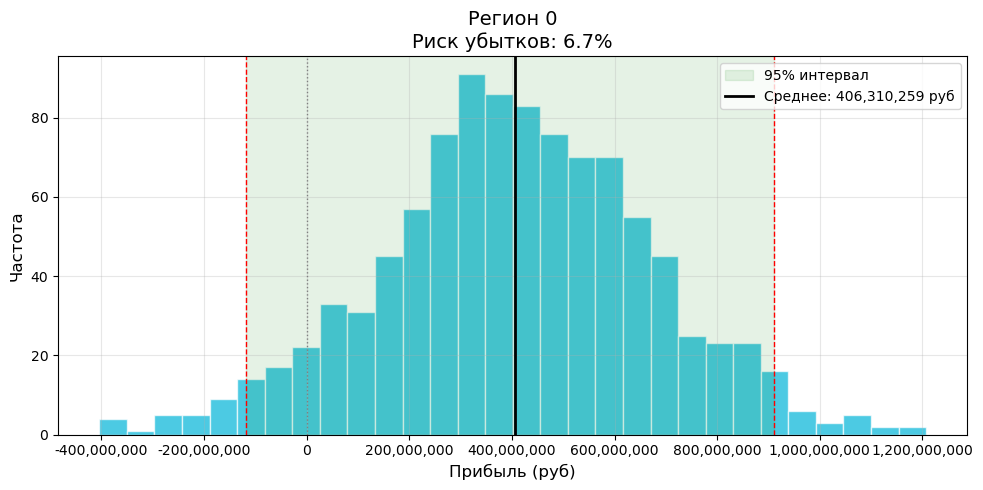


Регион 1:
Доверительный интервал: [16846174, 815972526] руб
Среднее: 432624131 руб
Риск: 1.9%


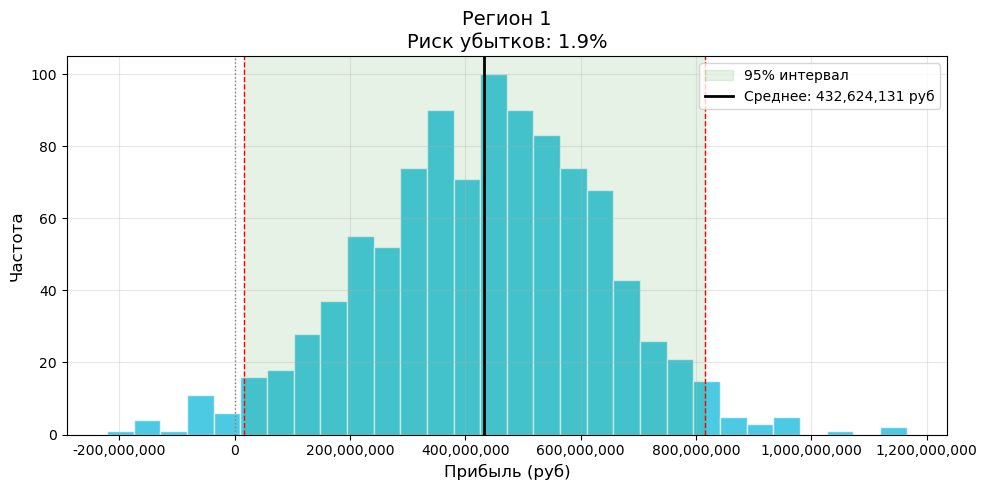


Регион 2:
Доверительный интервал: [-170780417, 901772131] руб
Среднее: 377362192 руб
Риск: 7.4%


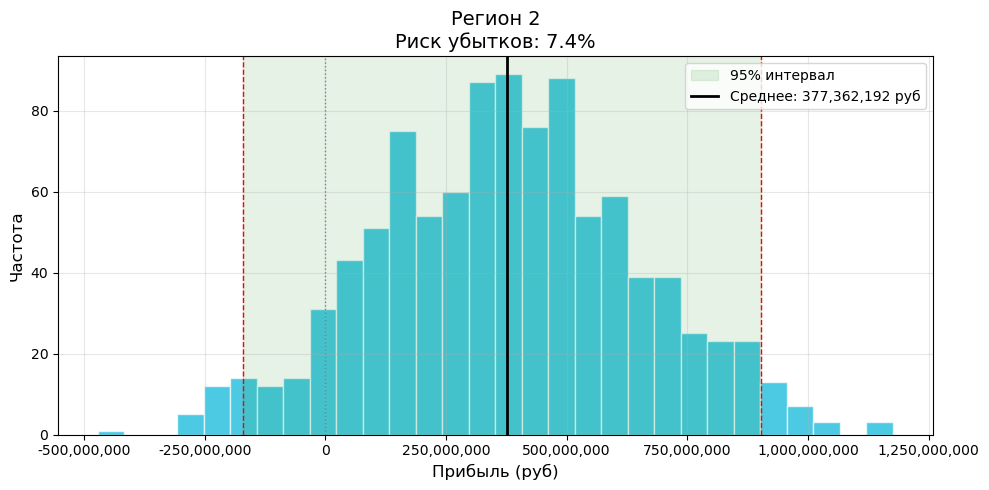

In [50]:
def bootstrap(pred, true, n_iter=1000, sample_size=TOTAL_POINTS):
    values = []
    target = pd.Series(true)
    pred = pd.Series(pred)
    
    rng = np.random.RandomState(12345)
    
    for _ in range(n_iter):
        
        indices = target.sample(n=sample_size, replace=True, random_state=rng).index
        target_subsample = target.loc[indices]
        pred_subsample = pred.loc[indices]
        
        profit = calculate_profit(pred_subsample, target_subsample)
        values.append(profit)
    
    profit_series = pd.Series(values)
    mean_profit = int(profit_series.mean())
    lower = int(profit_series.quantile(0.025))
    upper = int(profit_series.quantile(0.975))
    risk = (profit_series < 0).mean()
    
    return mean_profit, lower, upper, risk, pd.Series(values)

predict_0 = pd.Series(predict_0, index=y_valid_0.index)
predict_1 = pd.Series(predict_1, index=y_valid_1.index)
predict_2 = pd.Series(predict_2, index=y_valid_2.index)


results = {
    'Регион 0': bootstrap(predict_0, y_valid_0),
    'Регион 1': bootstrap(predict_1, y_valid_1),
    'Регион 2': bootstrap(predict_2, y_valid_2)
}

for region, (mean, lower, upper, risk, values) in results.items():
    print(f"\n{region}:")
    print(f"Доверительный интервал: [{lower:.0f}, {upper:.0f}] руб")
    print(f"Среднее: {mean:.0f} руб")
    print(f"Риск: {risk:.1%}")
    plot_bootstrap_histogram(mean, lower, upper, risk, values, region)

**Вывод по подсчету прибыли**

Лучшим оказался **Регион 1**:
* риск соответствует ТЗ (1.9% < 2.5%)
* приносит максимальную среднюю прибыль (433 млн руб)
* 95% гарантия безубыточности (даже в худшем сценарии прибыль положительна)

Регионы 0 и 2 не рекомендуются из-за высокого риска убытков, несмотря на потенциально высокую прибыль

### Итоговый вывод

**Описание задачи**

Построить модель для определения региона, где добыча принесёт наибольшую прибыль. Проанализировать возможную прибыль и риски техникой Bootstrap.

Условия задачи:
* Для обучения модели подходит только линейная регрессия (остальные — недостаточно предсказуемые).
* При разведке региона исследуют 500 точек, из которых с помощью машинного обучения выбирают 200 лучших для разработки.
* Бюджет на разработку скважин в регионе — 10 млрд рублей.
* При нынешних ценах один баррель сырья приносит 450 рублей дохода. Доход с каждой единицы продукта составляет 450 тыс. рублей, поскольку объём указан в тысячах баррелей.
* После оценки рисков нужно оставить лишь те регионы, в которых вероятность убытков меньше 2.5%. Среди них выбирают регион с наибольшей средней прибылью.


**Загрузка данных**

Данные были успешно загружены
* пропуски отсутствуют
* типы данных корректны
* названия столбцов удовлетворяют стандарту sneak_case

**Подготовка данных**

1. Дубликаты
* дубликаты отсутсвуют

2. Анализ признаков и аномалий
* В *РЕГИОНЕ 0* обычно объем запасов в скважине составляет 55-130 тыс.баррелей
* В *РЕГИОНЕ 1* заметно меньше значений, которые может принимать объем скважин, чем в остальных регионах. Недостаточно данных, чтобы лучше оценить распределение
* В *РЕГИОНЕ 2* обычно обьем скважин составляет 45-130 тыс.барелей
* Заметные выбросы не обнаружены

3. Анализ корреляции признаков

*РЕГИОН 0:*
* признак **f2** средне коррелирует с целевым **product**
* признаки **f0** и **f1** слабо коррелируют с целевым **product**

Для обучения будем использовать все входные признаки

*РЕГИОН 1:*
* признак **f2** линейно зависим с целевыв **product**
* признаки **f0** и **f1**  почти не связаны линейно с целевым **product**

Не будем удалять признак **f2**, так как скорее всего именно благодаря нему получится предказать значения целевого признака. Для обучения оставим все признаки

*РЕГИОН 2:*

Ситуация похожа на РЕГИОН 1. Признаки **f0** и **f1** почти не связаны линейно с целевым **product**. А **f2** имеет умеренную линейную связь с **product**. Для обучения будем использовать все признаки

**Обучение моделей**

План:

1. Создадим функции:
* prepros_data(data), которая будет отвечать за разбивку данных на обучающую и валидационную выборки в соотношении 75:25
* model_param(X_train, y_train), которая с помощью пайплайна будет масштабировать признаки, затем обучать их, перебирая разные линейные модели. 

2. Применим функции к датафреймам region_0, region_1, region_2, получим:
* название лучшей модели с ее параметрами
* предсказания среднего запаса сырья
* среднеквадратичную ошибку RMSE

Суммарный предсказанный запас в регионе 0 - 2309970 тыс. баррелей
Суммарный реальный запас в регионе 0 - 2308149 тыс. баррелей

Суммарный предсказанный запас в регионе 1 - 1717822 тыс. баррелей
Суммарный реальный запас в регионе 1 - 1718135 тыс. баррелей

Суммарный предсказанный запас в регионе 2 - 2369276 тыс. баррелей
Суммарный реальный запас в регионе 2 - 2378775 тыс. баррелей

Предсказанные и реальные запасы почти совпали, что говорит о хорошей точности модели

Посмотрим на полученные результаты:







In [51]:
HTML(styled_html0)

Регион,Средние запасы (тыс. баррелей),RMSE
0,92.40,37.67
1,68.71,0.89
2,94.77,40.03


Регион 1 дает стабильные и предсказуемые результаты

Регионы 0 и 2 могут содержать как очень богатые, так и бедные скважины, что увеличивает риски

**Подготовка к расчету прибыли**

На этом этапе были добавлены необходимые константы для расчета прибыли:

BUDGET = 10^10  # Бюджет разработки (10 млрд руб)

INCOME_PER_UNIT = 450000  # Доход с тыс. баррелей (450 руб/баррель * 1000)

TOTAL_POINTS = 500  # Исследуемые точки

WELLS_TO_DRILL = 200  # Скважин для разработки

Также был рассчитан достаточный объём сырья для безубыточной разработки новой скважины.

Выяснилось, что каждая из 200 скважин должна в среднем давать 111 тыс. баррелей, чтобы проект окупился.

In [52]:
HTML(styled_html1)

Регион,Средние запасы (тыс. баррелей),Разница от безубыточности
0,92.40,-18.71
1,68.71,-42.40
2,94.77,-16.34


Все 3 региона в среднем не достигают безубыточного уровня (111 тыс. баррелей на скважину)

**Расчет прибыли скважин**

На этом этапе была создана функция *calculate_profit* для подсчета прибыли скважин.

Также была подсчитана прибыль 200 лучших скважин каждого региона

Прибыль лучших 200 в Регион 0: 3359141114 руб
Прибыль лучших 200 в Регион 1: 2415086697 руб
Прибыль лучших 200 в Регион 2: 2598571759 руб

**Риски и прибыль для каждого региона**

На этом этапе была создана функция *bootstrap*, которая будет имитировать разведку скважин.

Ее шаги:

В цикле 1000 раз будем выбирать 500 (из 25000) случайных скважин в регионе. 

Для каждого раза будем:

* из этих 500 отбирать 200 лучших скважин по предсказанию модели
* считать прибыль для этих 200 скважин по реальным данным (валидационная целевая выборка)
    
После выполнения цикла:
* посчитаем среднюю прибыль 
* посчитаем 2.5% и 97.5% квантили, чтобы найти 95% доверительный интервал
* посчитаем риск убытков в процентах

Результаты:

Регион 0:
* 95% доверительный интервал: [-117742136, 911737050] руб
* Средняя прибыль: 406310259 руб
* Риск убытков: 6.7%

Регион 1:
* 95% доверительный интервал: [16846174, 815972526] руб
* Средняя прибыль: 432624131 руб
* Риск убытков: 1.9%

Регион 2:
* 95% доверительный интервал: [-170780417, 901772131] руб
* Средняя прибыль: 377362192 руб
* Риск убытков: 7.4%

**Рекомендации**

Лучше выбрать **Регион 1**:
* риск соответствует ТЗ (1.9% < 2.5%)
* приносит максимальную среднюю прибыль (433 млн руб)
* 95% гарантия безубыточности (даже в худшем сценарии прибыль положительна)

Регионы 0 и 2 не рекомендуются из-за высокого риска убытков, несмотря на потенциально высокую прибыль